# CAD Map Visualization

In [3]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../../')
os.chdir("../../")

In [4]:
floor_o_labels = pd.read_csv("./data/processed/cad_maps/building_033_floor_O_labels.csv", index_col=0)
floor_o_lines = pd.read_csv("./data/processed/cad_maps/building_033_floor_O_lines.csv", index_col=0)

In [5]:
all_walls = floor_o_lines["Line Layer"].str.contains("WAENDE")
all_pillars = floor_o_lines["Line Layer"].str.contains("STUETZEN")
all_stairs = floor_o_lines["Line Layer"].str.contains("TREPPEN")
all_ceilings = floor_o_lines["Line Layer"].str.contains("DECKEN")
floor_o_plot_lines = floor_o_lines[all_walls | all_ceilings | all_stairs]
floor_o_plot_lines["Line Layer"].unique()

array(['A_M1-___E_TRENNWAENDE', 'A_E--___E_WAENDE', 'A_E0-___E_DECKEN',
       'A_E0-___E_TREPPEN'], dtype=object)

In [6]:
start_x_coords = floor_o_plot_lines["Start X-coordinate"].to_numpy()
start_y_coords = floor_o_plot_lines["Start Y-coordinate"].to_numpy()
end_x_coords = floor_o_plot_lines["End X-coordinate"].to_numpy()
end_y_coords = floor_o_plot_lines["End Y-coordinate"].to_numpy()

line_x_coords = np.vstack([start_x_coords, end_x_coords])
line_y_coords = np.vstack([start_y_coords, end_y_coords])

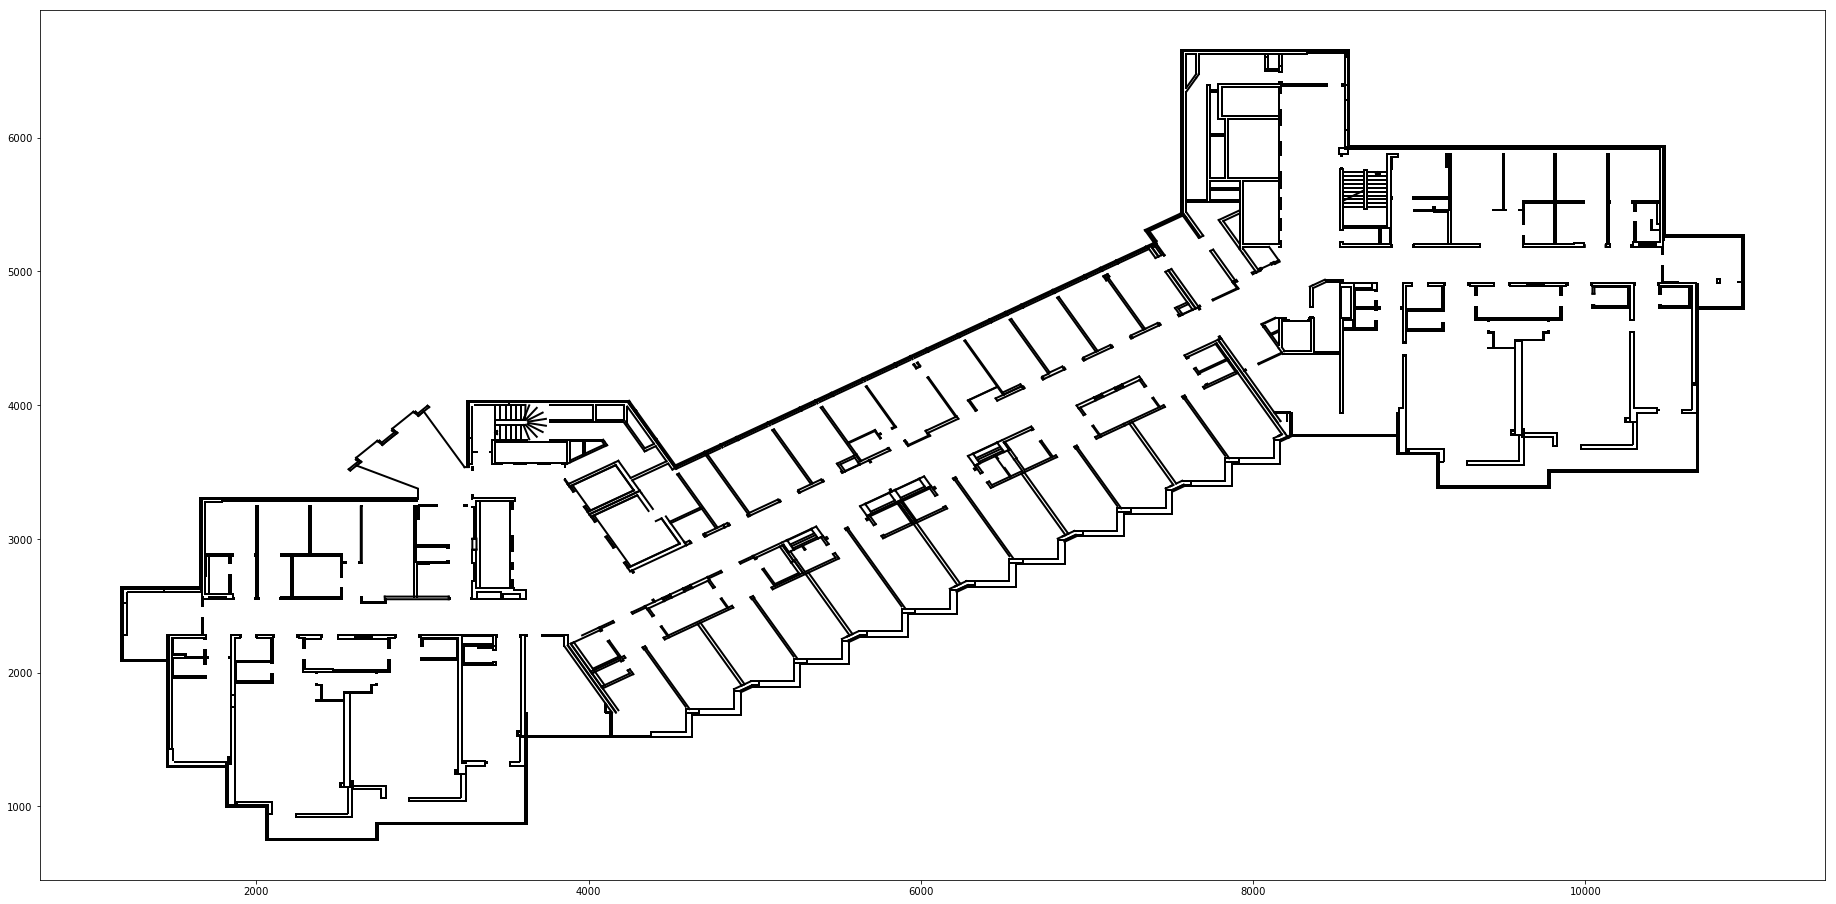

In [7]:
fig = plt.figure(figsize=(32,16))
plt.plot(line_x_coords, line_y_coords, linewidth=2, color='black')
plt.show()

In [8]:
floor_o_plot_labels = floor_o_labels[floor_o_labels["Label Type"] == "Room ID"] #floor_o_labels[~all_letters & ~room_name & ~room_size & ~single_character]
floor_o_plot_labels["Label Text"].to_list()

['128a',
 '128b',
 '127b',
 '127a',
 '126b',
 '126c',
 '128',
 '127',
 '126',
 '126a',
 '125a',
 '125',
 '124',
 '123a',
 '123b',
 '123',
 '122',
 '121',
 '120',
 '119',
 '118',
 '121a',
 '120b',
 '120a',
 '119a',
 '118a',
 '117a',
 '117',
 '116',
 '116a',
 '115',
 '115a',
 '113a',
 '114',
 '113',
 '112a',
 '112b',
 '112',
 '957',
 '111',
 '111a',
 '110b',
 '110a',
 '109b',
 '109a',
 '110',
 '109',
 '108c',
 '108b',
 '108a',
 '108',
 '107',
 '107a',
 '106',
 '105b',
 '105',
 '104',
 '103b',
 '105a',
 '104a',
 '103a',
 '103',
 '102a',
 '102',
 '901',
 '101',
 '900',
 '144a',
 '145',
 '956',
 '955',
 '954',
 '953',
 '952',
 '951',
 '950',
 '902',
 '146',
 '146a',
 '144',
 '143',
 '142',
 '141',
 '140',
 '139',
 '139a',
 '139b',
 '138',
 '137',
 '136',
 '135',
 '903',
 '904',
 '134',
 '906',
 '963',
 '962',
 '961',
 '960',
 '959',
 '958',
 '905',
 '964',
 '965',
 '966',
 '133a',
 '133',
 '967',
 '968',
 '132',
 '132a',
 '132b',
 '131',
 '130a',
 '130b',
 '130',
 '907',
 '129',
 '905a',
 '

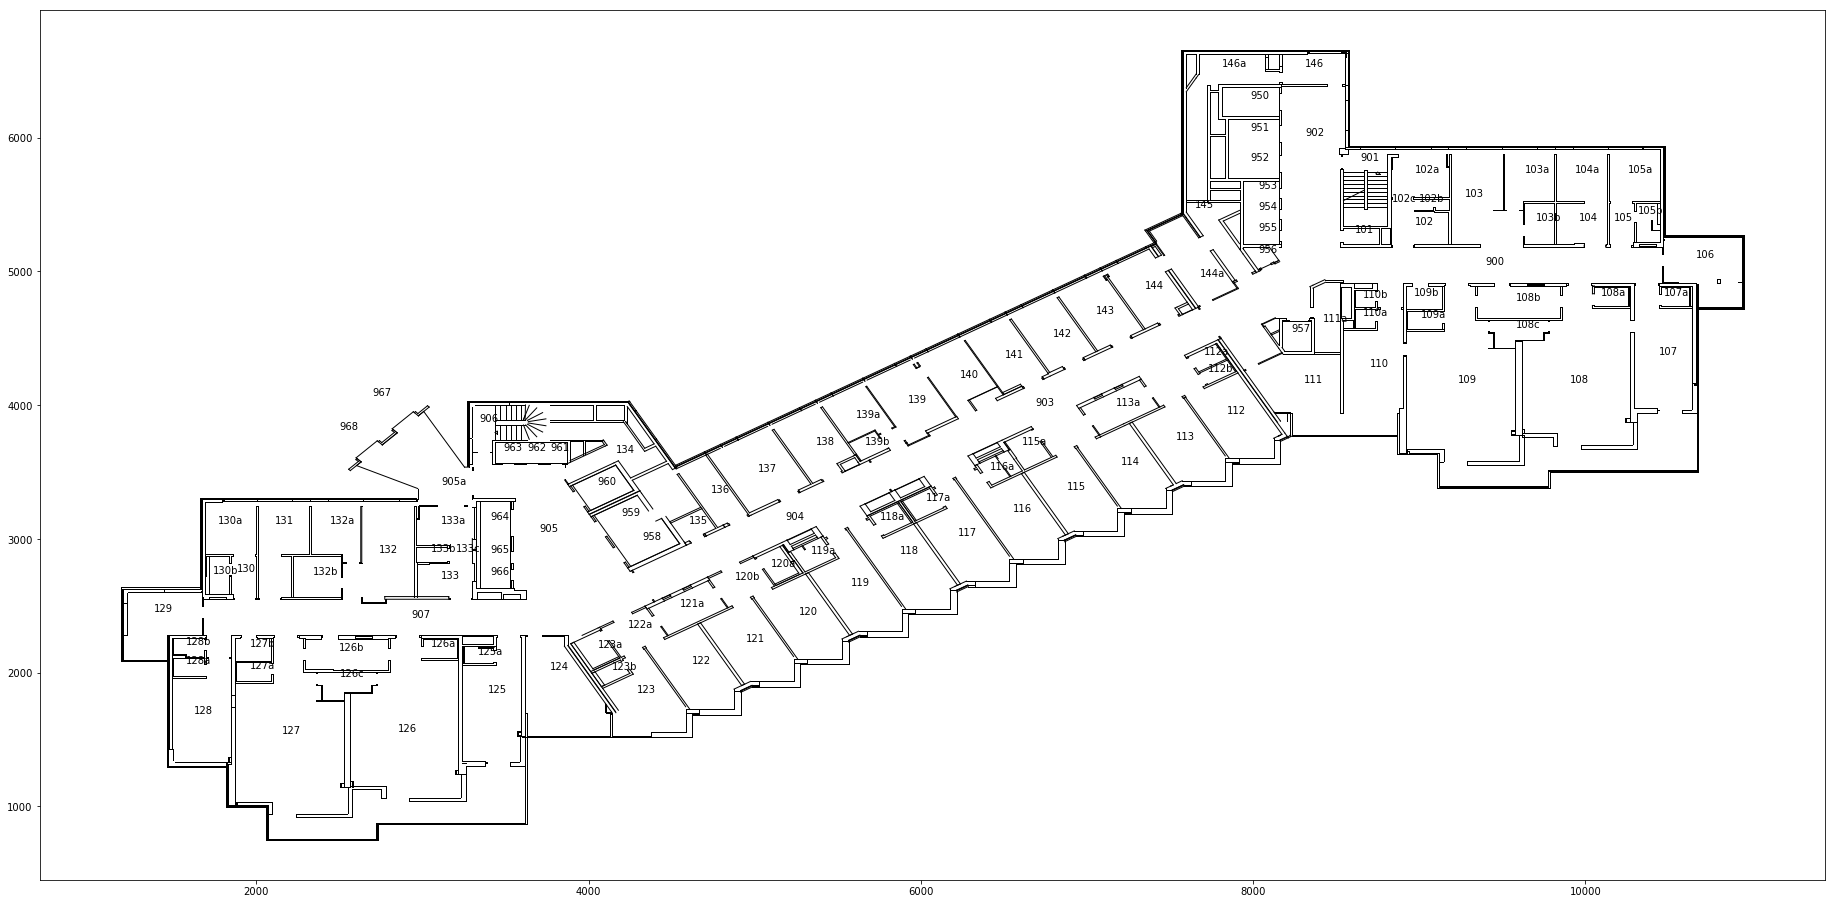

In [9]:
labels = floor_o_plot_labels["Label Text"].to_list()
label_x_coords = floor_o_plot_labels["X-coordinate"].to_numpy()
label_y_coords = floor_o_plot_labels["Y-coordinate"].to_numpy()

fig = plt.figure(figsize=(32,16))
plt.plot(line_x_coords, line_y_coords, linewidth=1, color='black')

for i, label in enumerate(labels):
    plt.annotate(label, (label_x_coords[i], label_y_coords[i]))
    
# plt.axis("off")
plt.show()

## Calculate euclidian distances

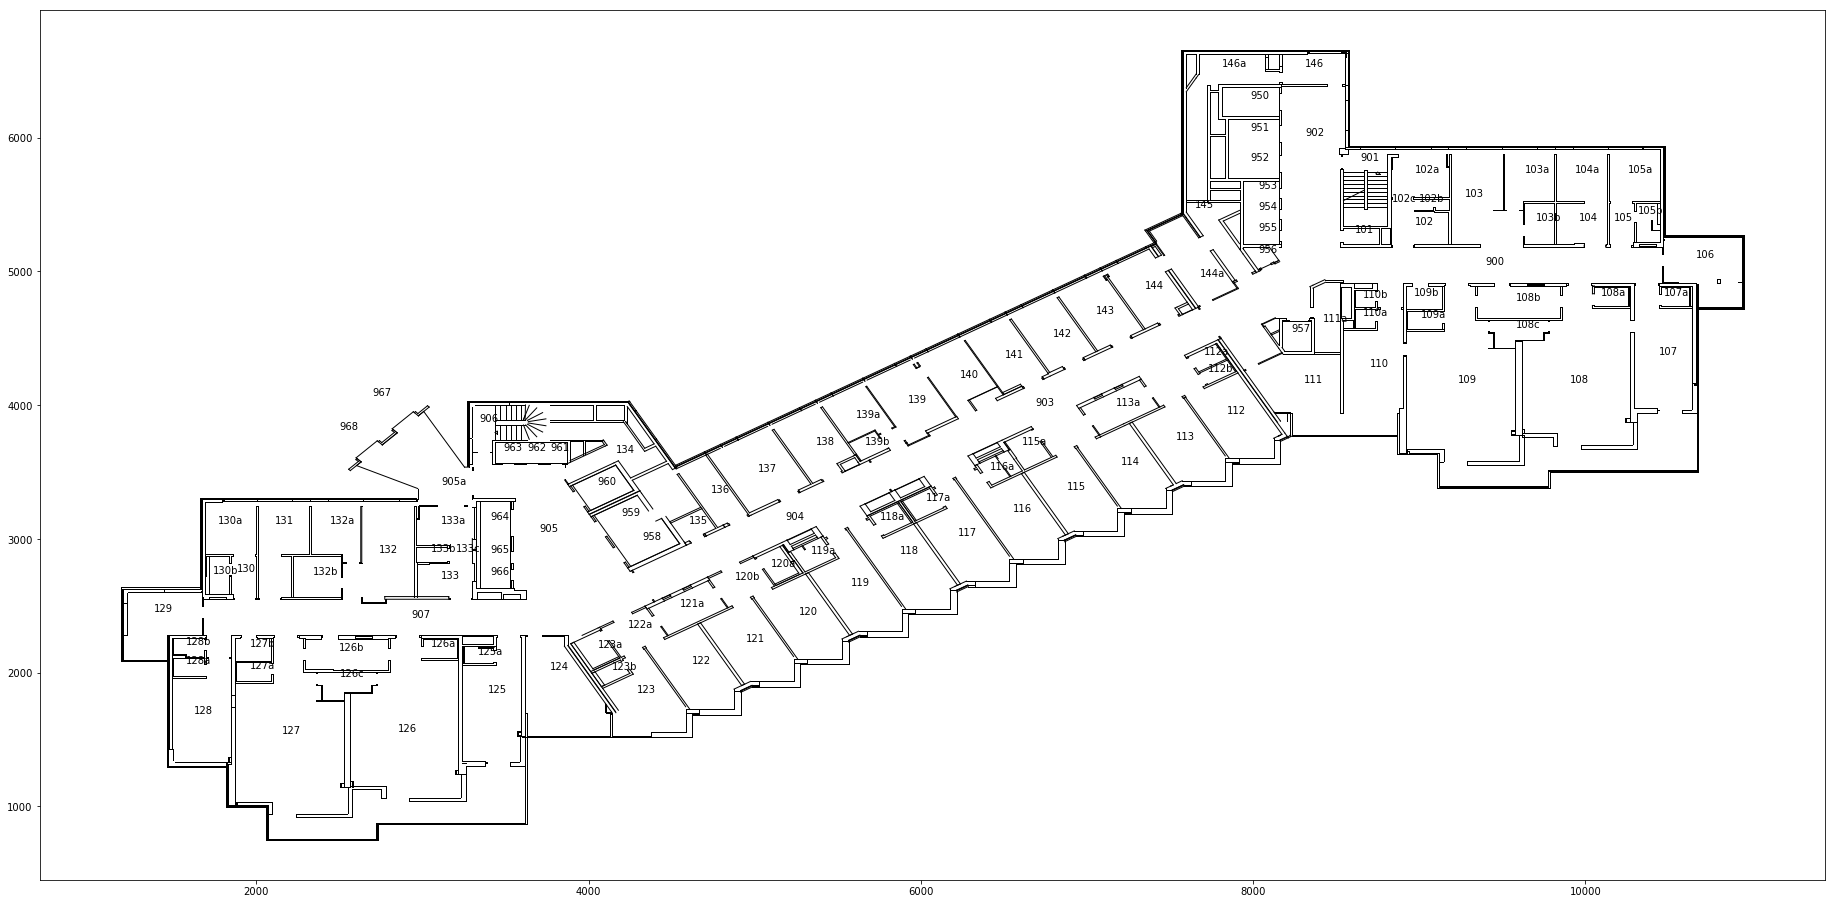

In [10]:
# import matplotlib.pyplot as plt
# from matplotlib import style
# style.use('ggplot') or plt.style.use('ggplot')

labels = floor_o_plot_labels["Label Text"].to_list()
label_x_coords = floor_o_plot_labels["X-coordinate"].to_numpy()
label_y_coords = floor_o_plot_labels["Y-coordinate"].to_numpy()

# label_x_coords  /= 2^16
# label_y_coords /= 2^16

fig = plt.figure(figsize=(32,16))
plt.plot(line_x_coords, line_y_coords, linewidth=1, color='black')

for i, label in enumerate(labels):
    # plt.text(label_x_coords[i], label_y_coords[i], label)
    plt.annotate(label, (label_x_coords[i], label_y_coords[i]))

# plt.axis("off")
plt.show()

In [11]:
room_qty = len(labels)
room_distances = np.zeros([room_qty, room_qty])

for i in range(room_qty):
    for j in range(room_qty):
        room_distances[i, j] = np.linalg.norm(np.array([label_x_coords[i], label_y_coords[i]]) - np.array([label_x_coords[j], label_y_coords[j]]))

In [12]:
room_distances

array([[   0.        ,  144.36036931,  407.98125388, ..., 8042.31116965,
        1699.98708485, 1830.87885162],
       [ 144.36036931,    0.        ,  387.93067565, ..., 7981.32178886,
        1633.51807631, 1769.33393859],
       [ 407.98125388,  387.93067565,    0.        , ..., 7637.76938003,
        1302.54065816, 1429.47807344],
       ...,
       [8042.31116965, 7981.32178886, 7637.76938003, ...,    0.        ,
        6347.94302231, 6212.65142494],
       [1699.98708485, 1633.51807631, 1302.54065816, ..., 6347.94302231,
           0.        ,  148.83536408],
       [1830.87885162, 1769.33393859, 1429.47807344, ..., 6212.65142494,
         148.83536408,    0.        ]])

In [13]:
import pandas as pd

df = pd.DataFrame(room_distances)
df.columns = labels
df["Room"] = labels
df.set_index("Room", inplace=True)

df

,128a,128b,127b,127a,126b,126c,128,127,126,126a,...,130b,130,907,129,905a,122a,102b,102c,133b,133c
Room,,,,,,,,,,,,,,,,,,,,,
128a,0.000000,144.360369,407.981254,389.034389,927.648868,934.465829,372.475855,778.870521,1377.064709,1481.445864,...,695.857044,751.690921,1400.171095,432.970724,2037.068775,2672.237241,8186.919202,8042.311170,1699.987085,1830.878852
128b,144.360369,0.000000,387.930676,426.556580,923.083857,959.855462,515.963633,882.498318,1436.650715,1475.541046,...,556.432379,622.700465,1371.636893,309.939440,1945.348634,2661.424333,8127.015108,7981.321789,1633.518076,1769.333939
127b,407.981254,387.930676,0.000000,161.267440,535.156023,585.762543,601.696589,678.313114,1095.639320,1087.944985,...,594.246467,564.557482,993.516912,634.482437,1668.569121,2275.394563,7781.934336,7637.769380,1302.540658,1429.478073
127a,389.034389,426.556580,161.267440,0.000000,551.370784,545.498335,477.292512,525.319919,1010.599577,1100.595003,...,745.893577,724.535105,1040.965807,716.137890,1788.952094,2291.293721,7852.286823,7709.437557,1397.253316,1516.282370
126b,927.648868,923.083857,535.156023,551.370784,0.000000,195.993166,992.706080,714.846158,707.077367,554.288549,...,953.963617,848.807861,498.769020,1149.196760,1380.229975,1744.629789,7314.285868,7172.633671,924.194774,1020.695532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122a,2672.237241,2661.424333,2275.394563,2291.293721,1744.629789,1767.069862,2687.866582,2229.204891,1584.207637,1191.041748,...,2529.745629,2387.733865,1303.760122,2851.375603,1547.025430,0.000000,5729.717177,5597.553948,1309.624253,1177.267806
102b,8186.919202,8127.015108,7781.934336,7852.286823,7314.285868,7399.510741,8306.857969,7918.630325,7310.499028,6811.986806,...,7774.081406,7634.910995,6815.865965,8206.977361,6254.726011,5729.717177,0.000000,159.840411,6493.898182,6357.970659
102c,8042.311170,7981.321789,7637.769380,7709.437557,7172.633671,7259.689019,8165.316610,7780.874653,7176.742002,6672.928481,...,7625.025386,7486.192715,6674.044374,8058.949307,6104.584740,5597.553948,159.840411,0.000000,6347.943022,6212.651425


Plot all labels in one plot

Processing data/processed/cad_maps/building_005_floor_D_labels.csv...:   7%|▋         | 15/202 [00:00<00:02, 71.36it/s] /home/benelot/miniconda3/envs/vre-spark/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
Processing data/processed/cad_maps/building_009_floor_U1_labels.csv...: 100%|██████████| 202/202 [00:03<00:00, 66.34it/s]                


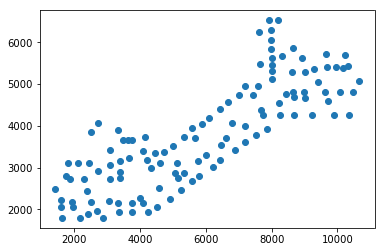

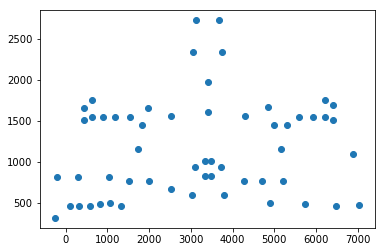

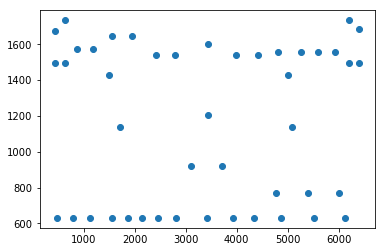

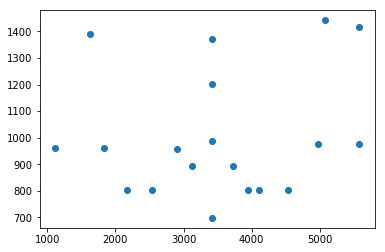

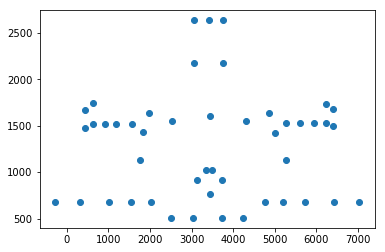

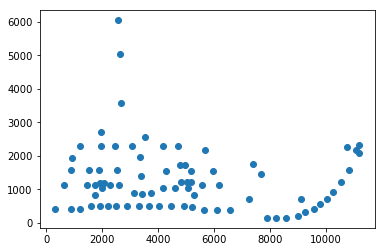

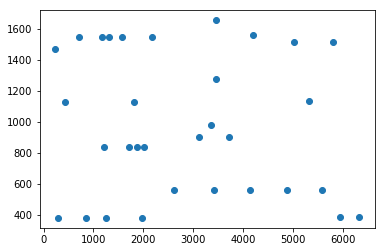

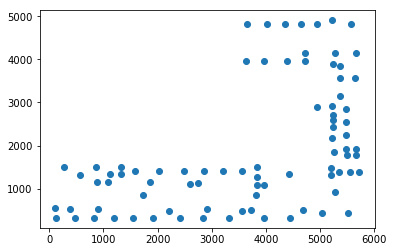

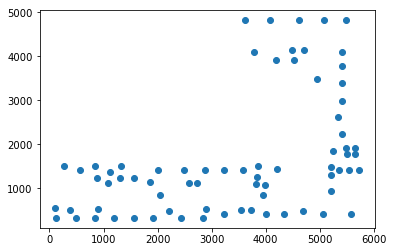

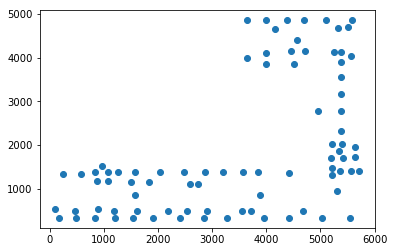

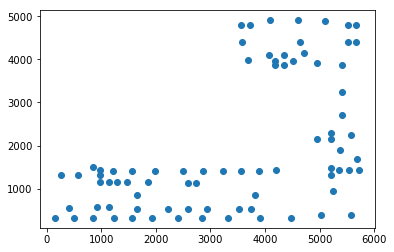

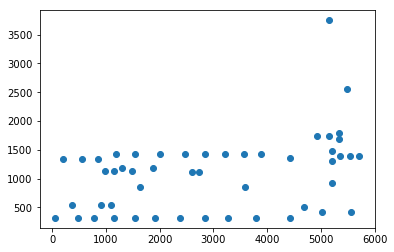

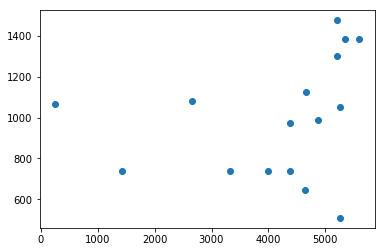

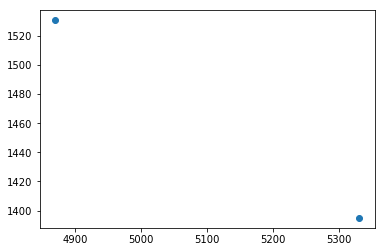

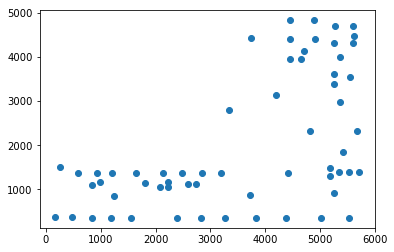

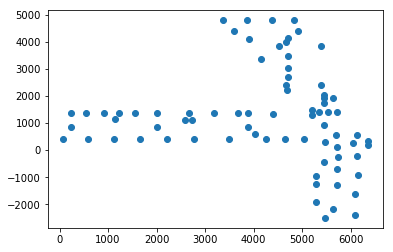

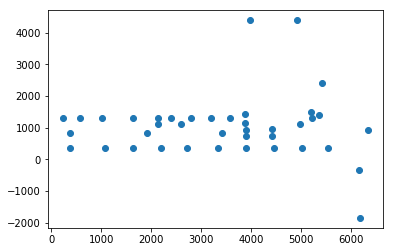

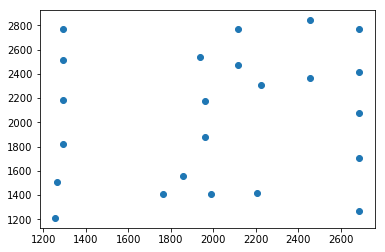

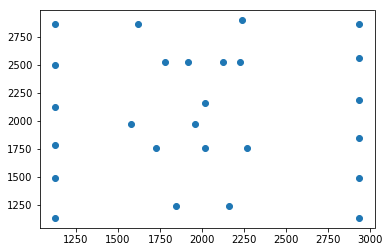

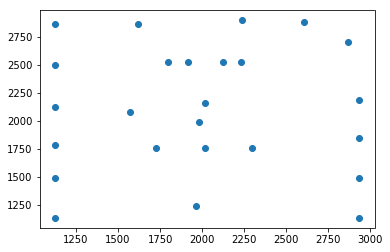

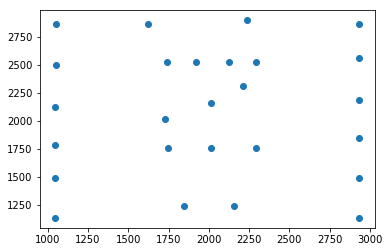

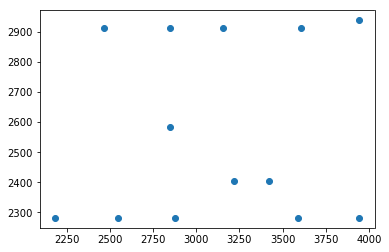

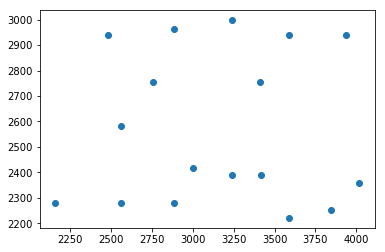

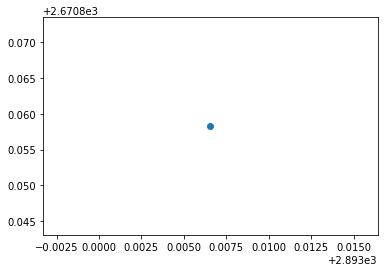

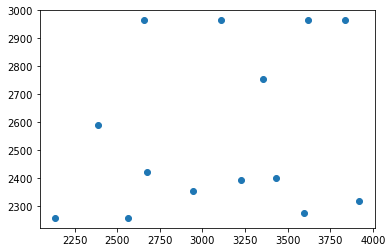

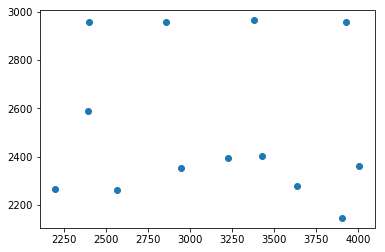

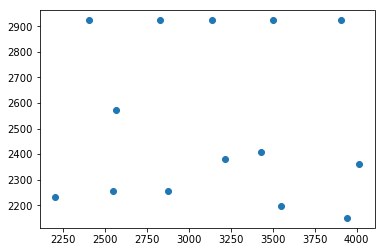

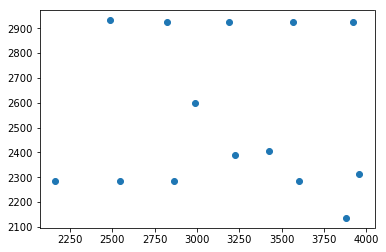

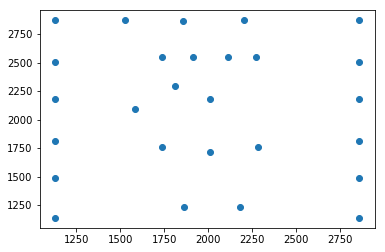

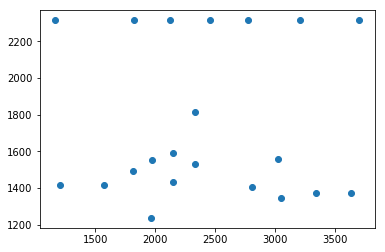

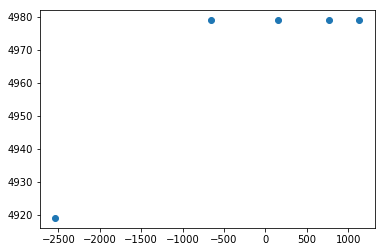

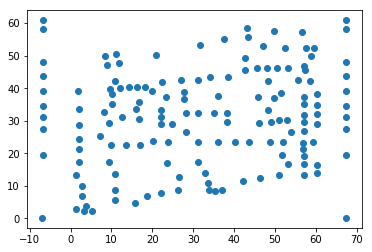

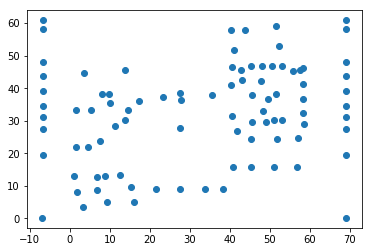

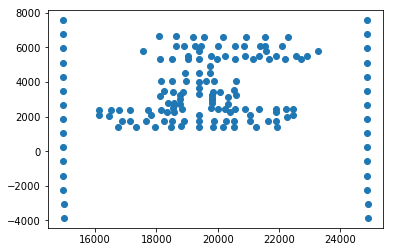

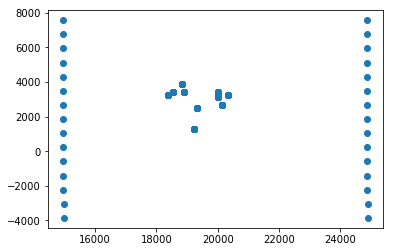

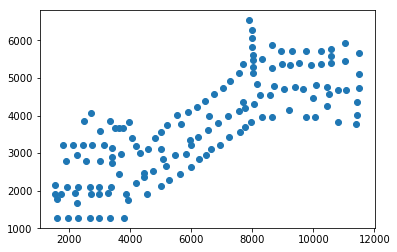

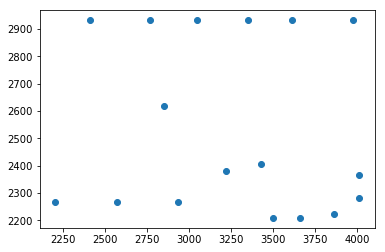

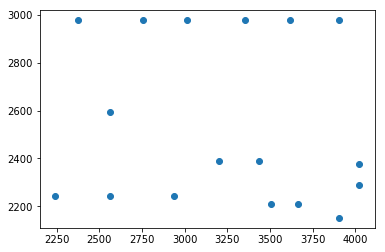

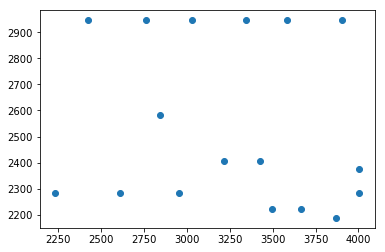

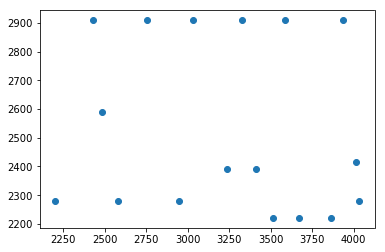

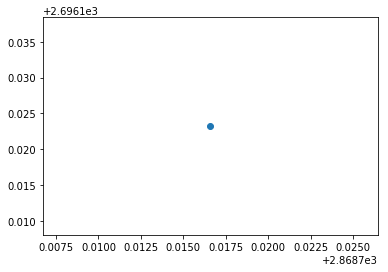

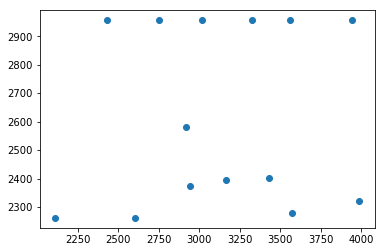

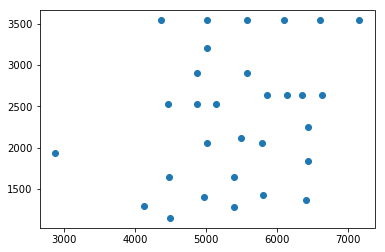

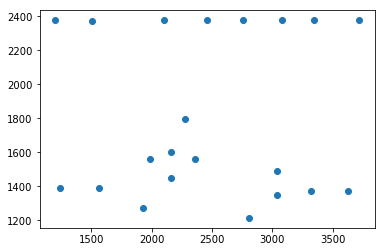

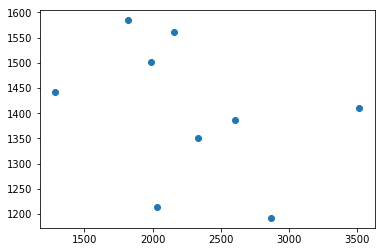

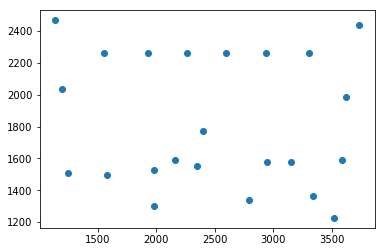

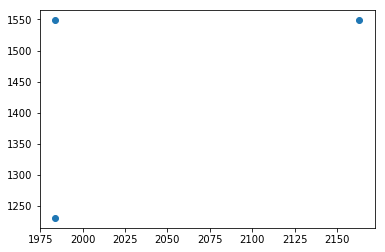

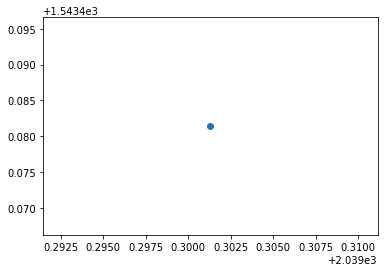

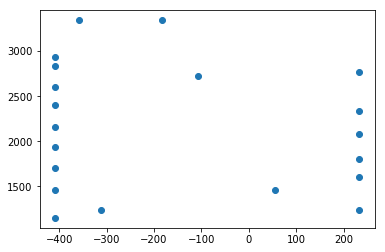

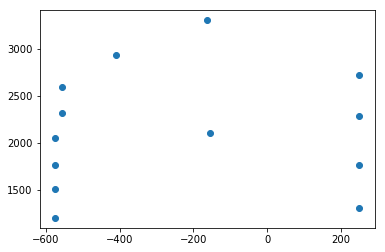

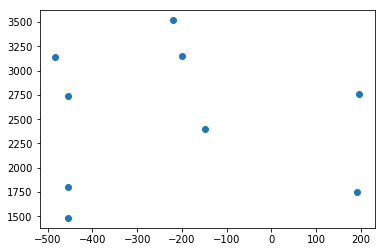

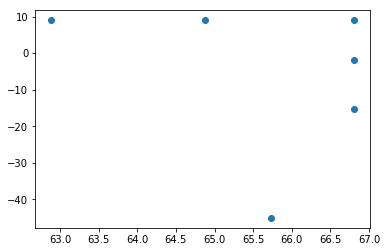

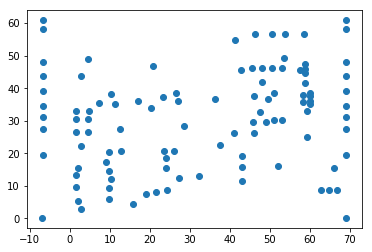

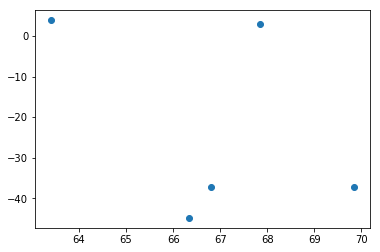

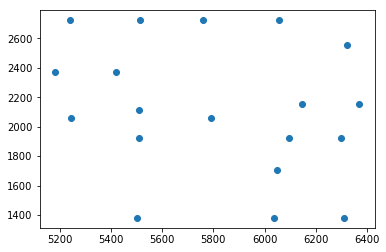

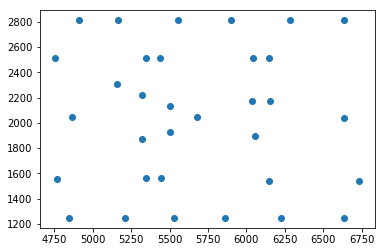

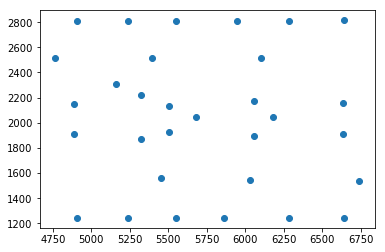

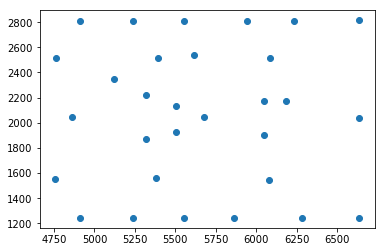

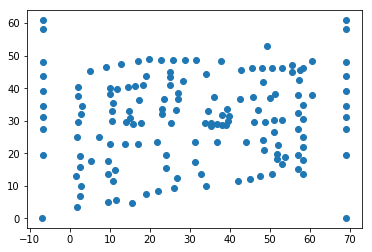

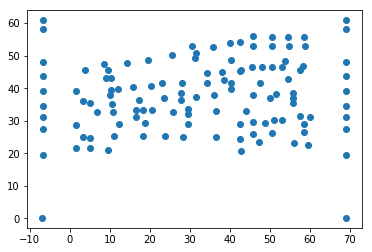

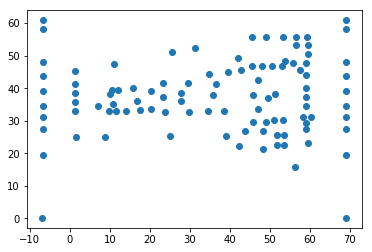

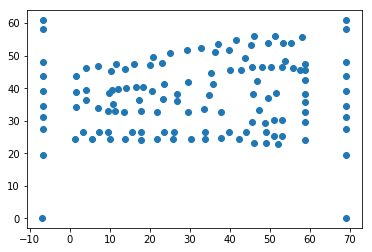

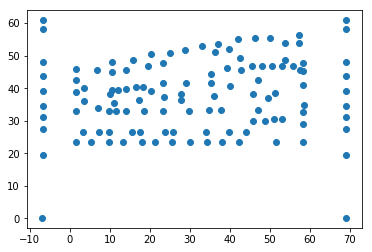

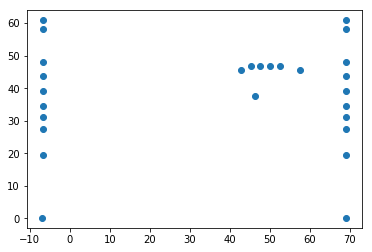

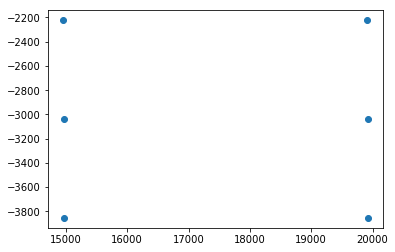

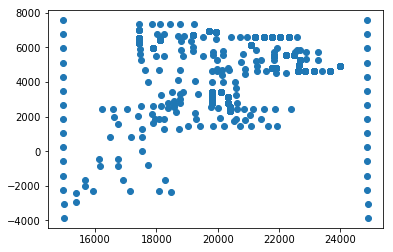

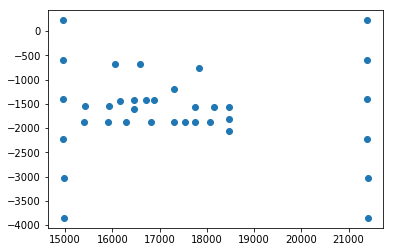

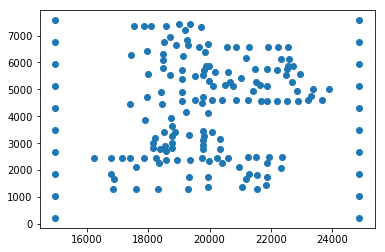

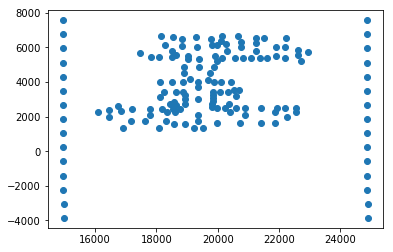

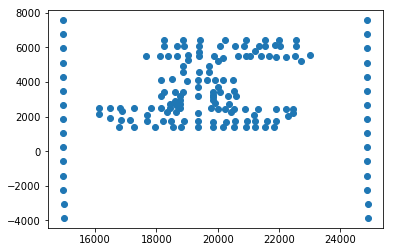

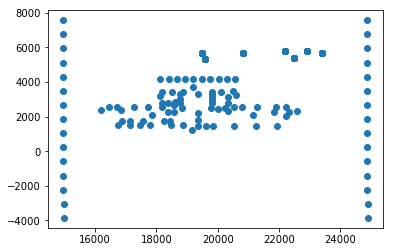

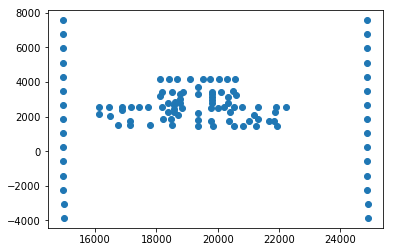

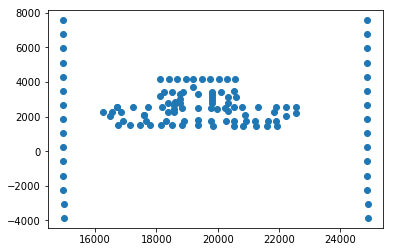

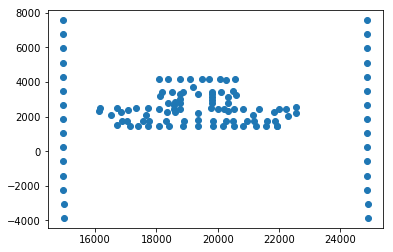

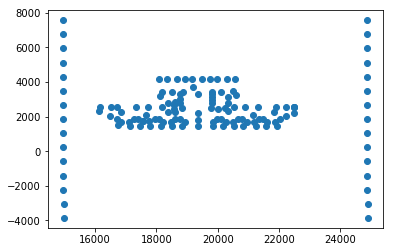

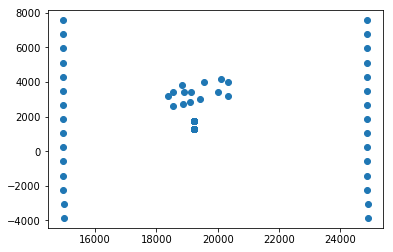

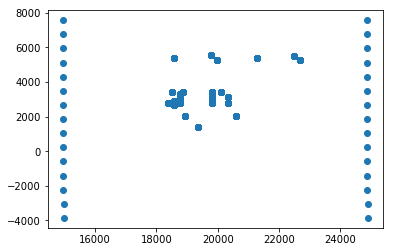

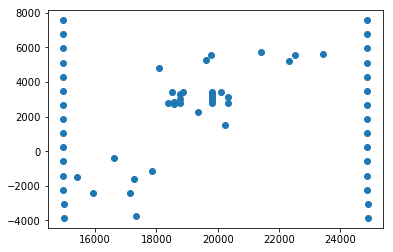

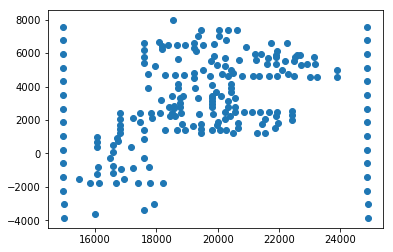

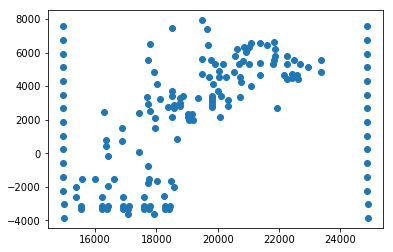

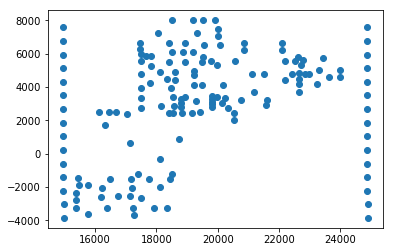

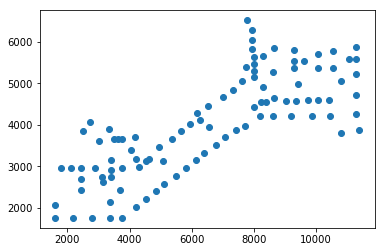

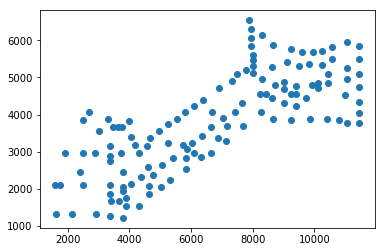

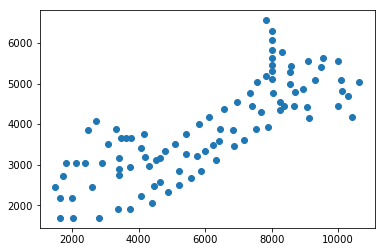

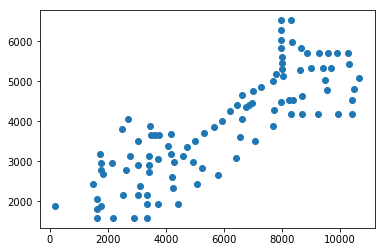

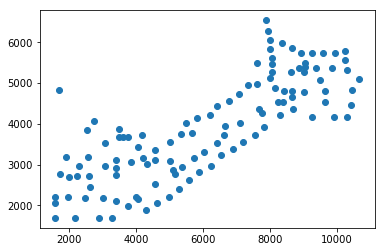

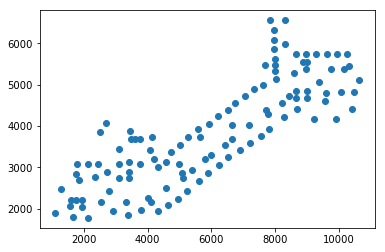

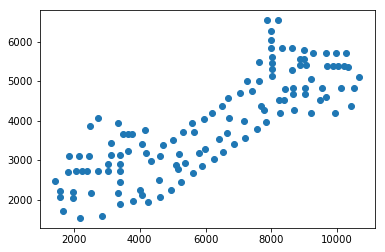

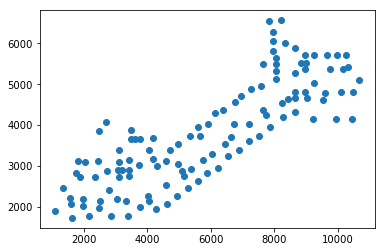

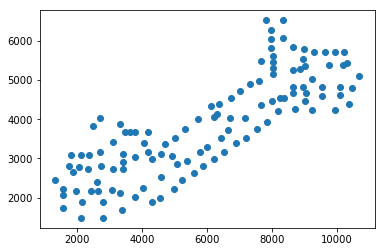

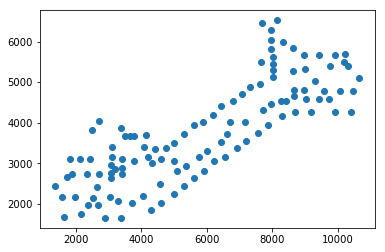

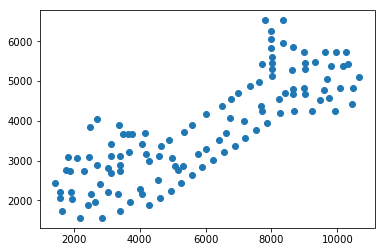

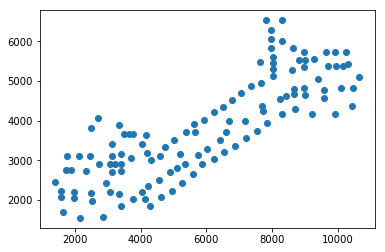

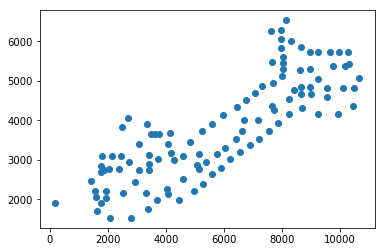

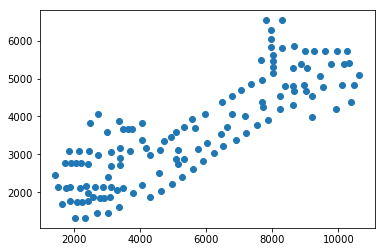

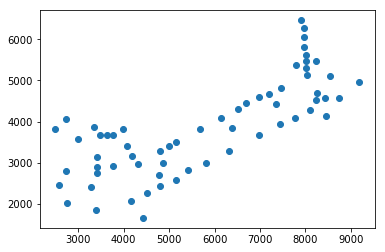

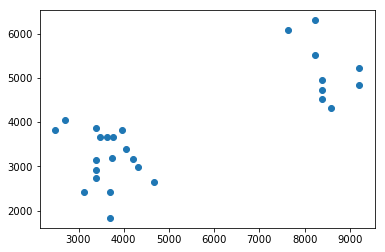

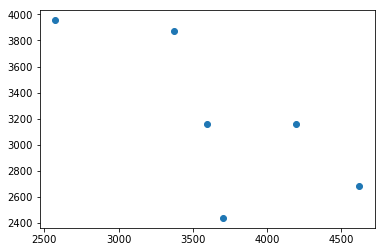

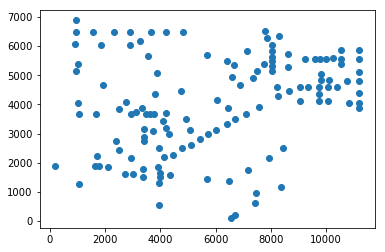

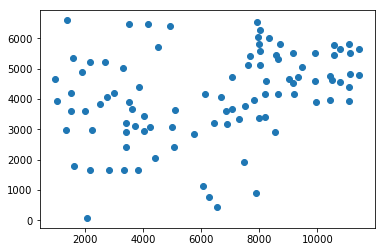

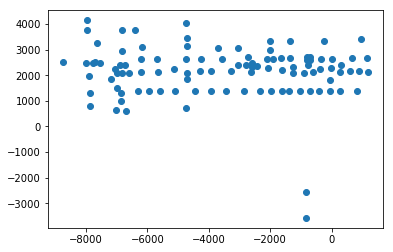

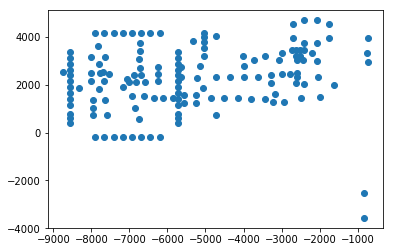

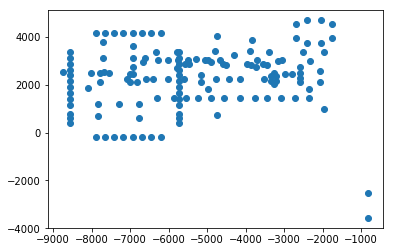

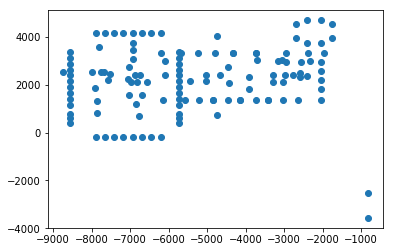

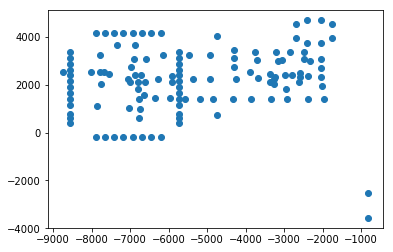

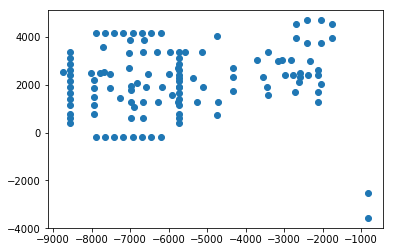

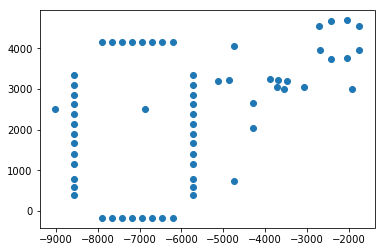

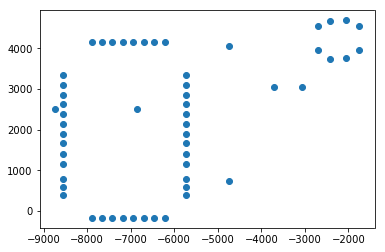

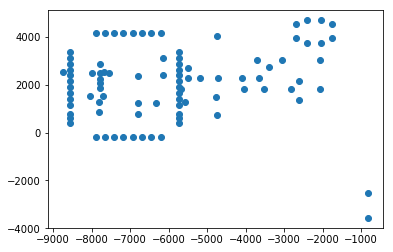

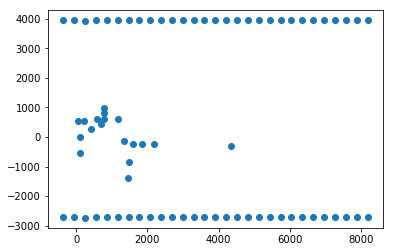

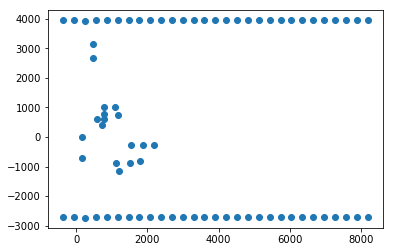

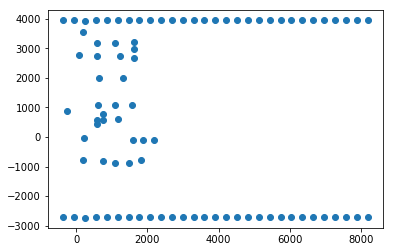

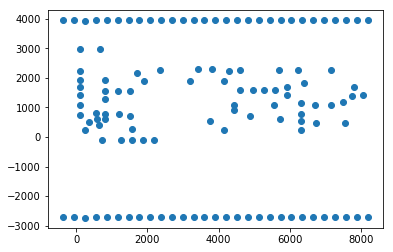

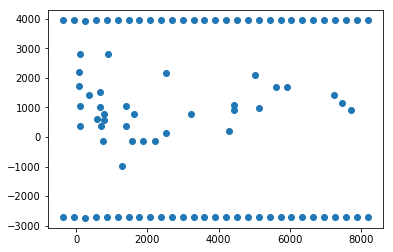

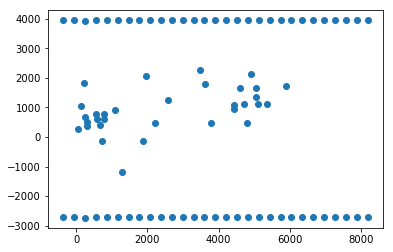

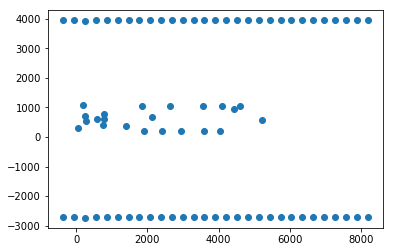

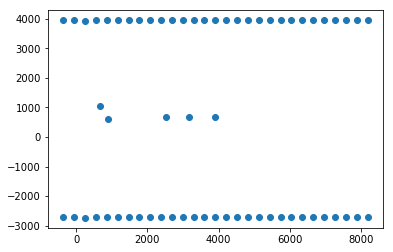

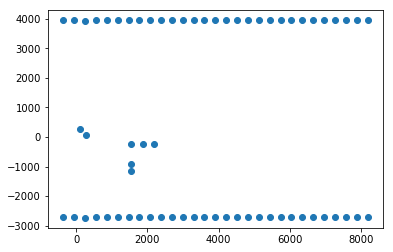

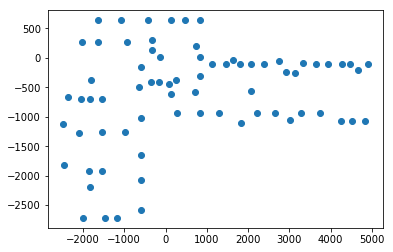

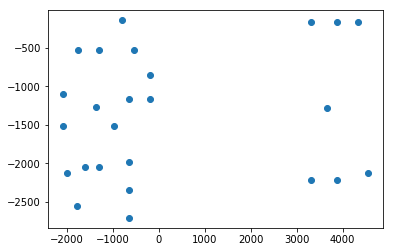

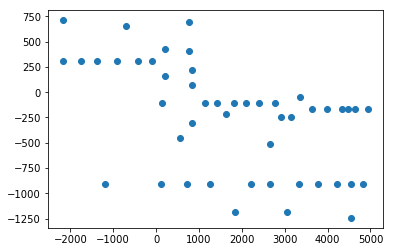

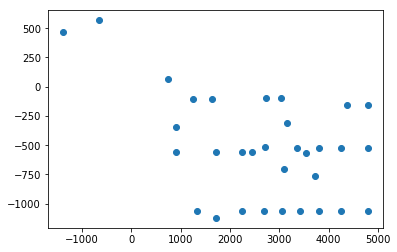

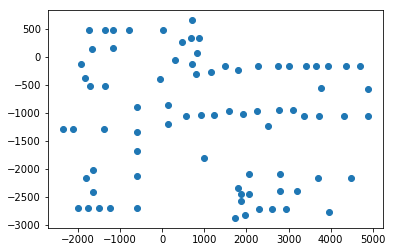

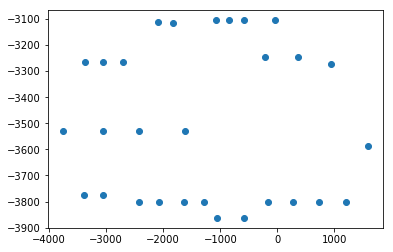

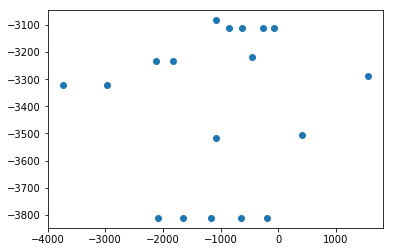

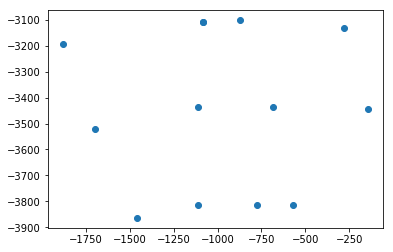

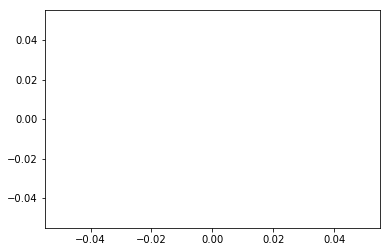

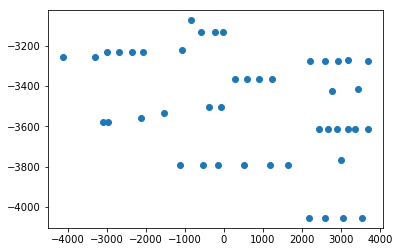

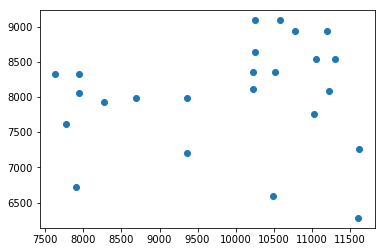

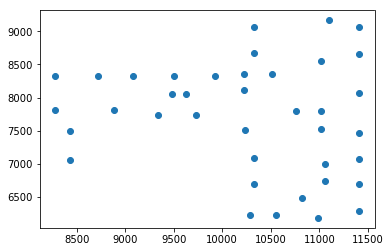

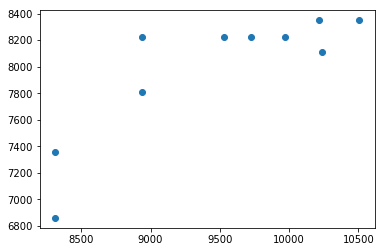

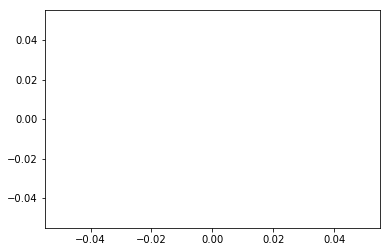

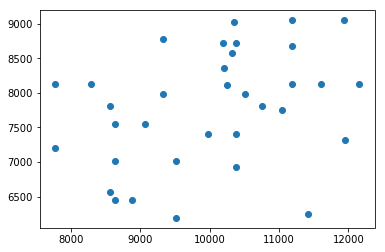

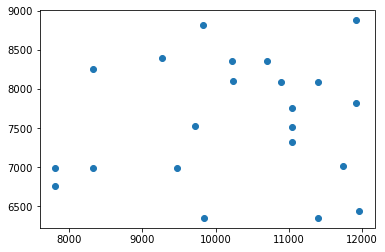

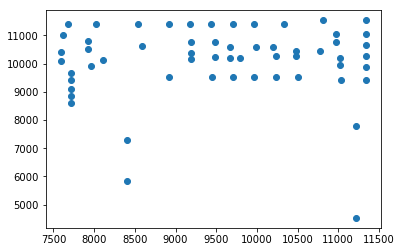

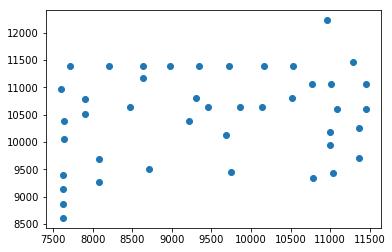

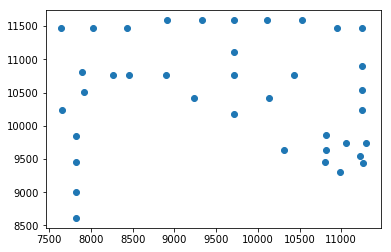

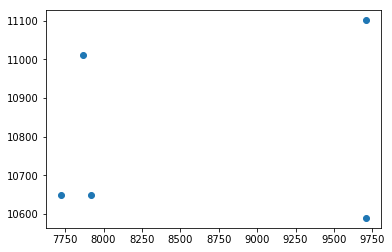

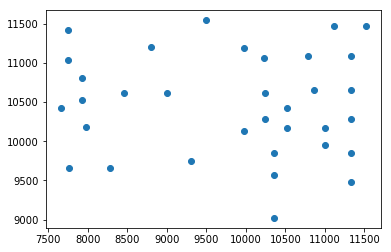

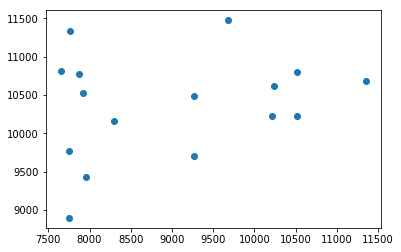

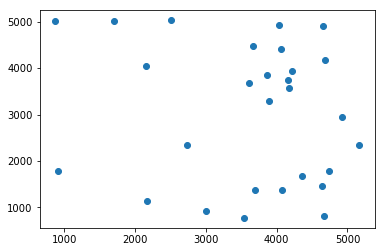

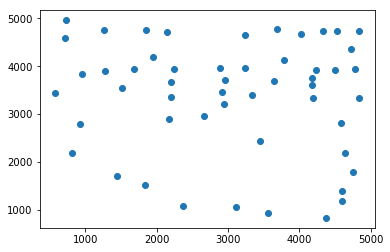

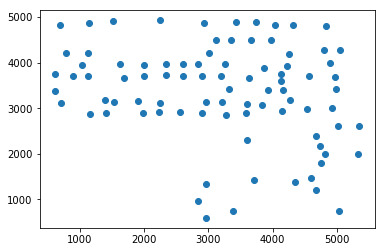

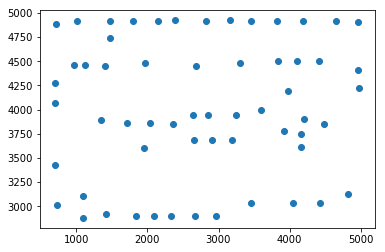

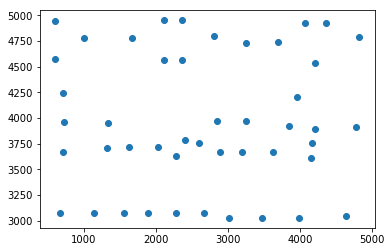

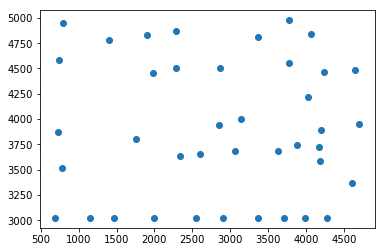

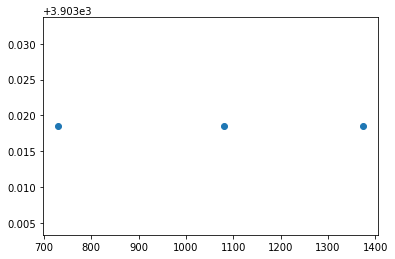

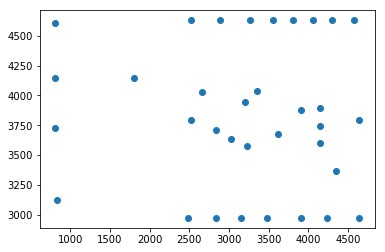

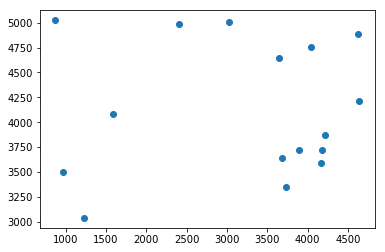

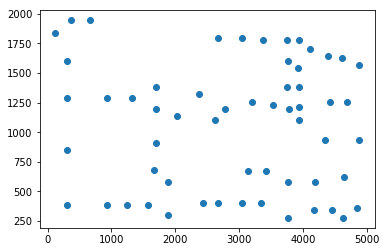

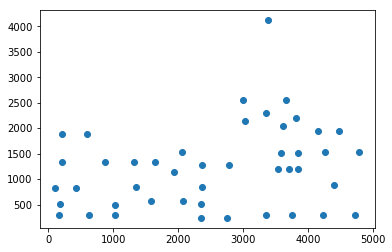

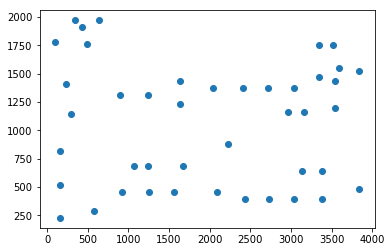

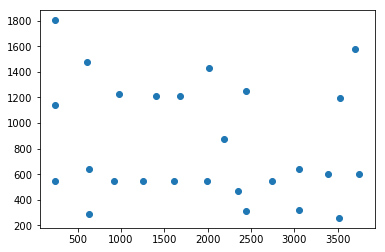

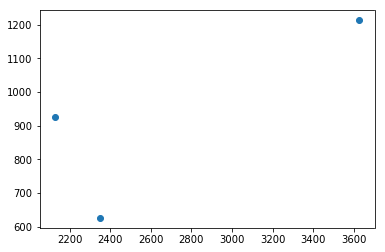

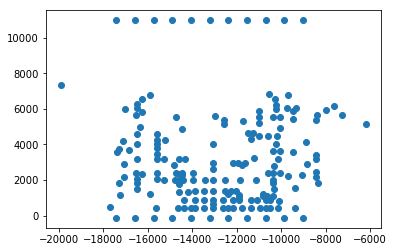

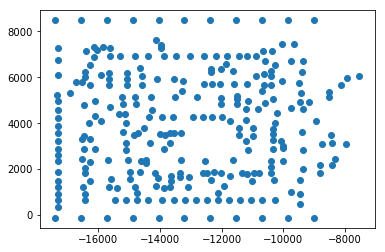

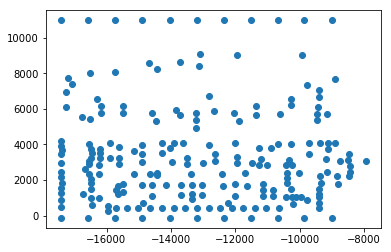

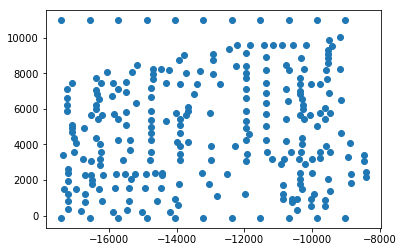

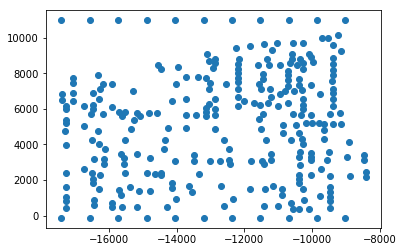

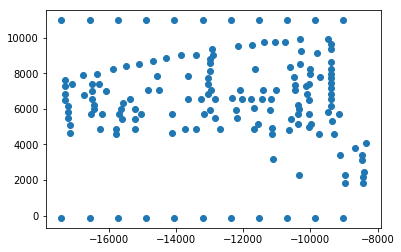

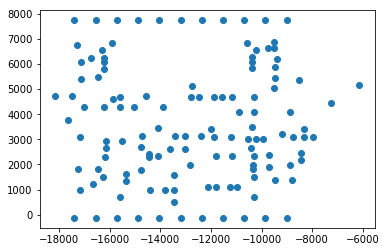

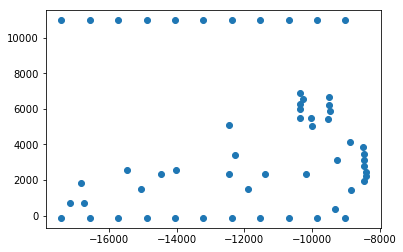

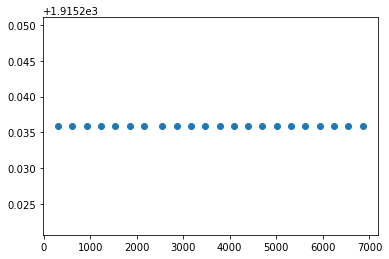

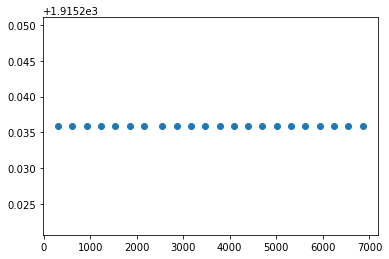

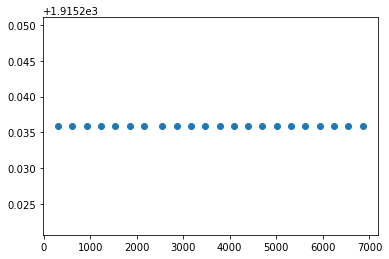

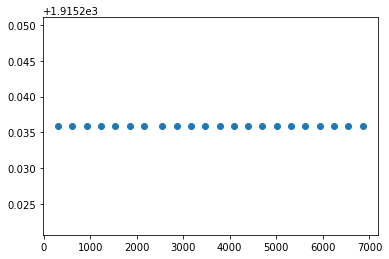

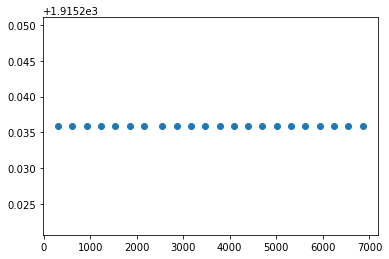

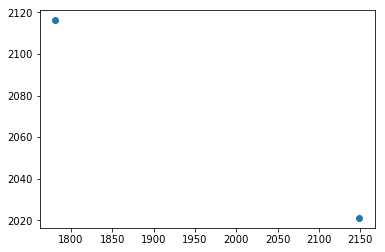

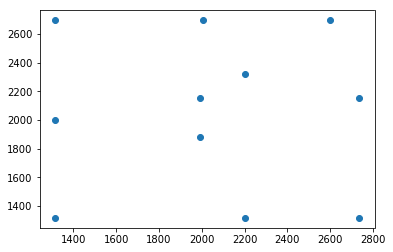

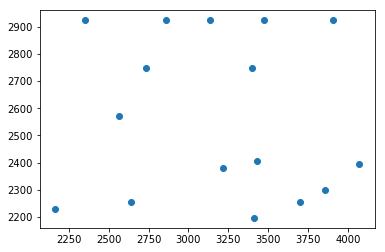

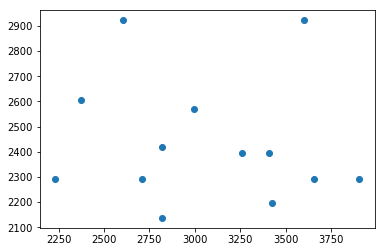

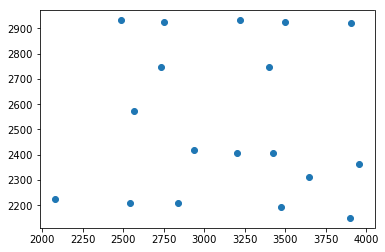

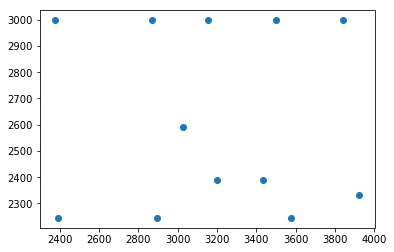

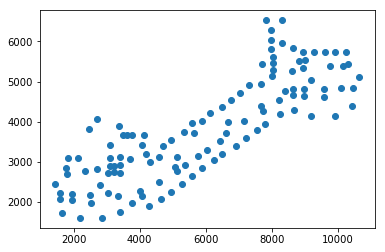

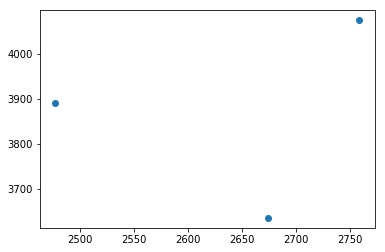

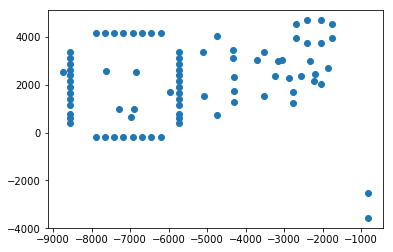

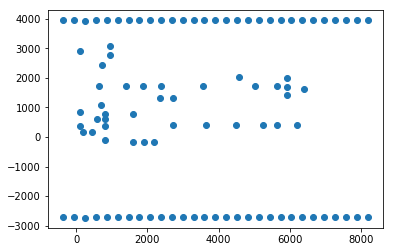

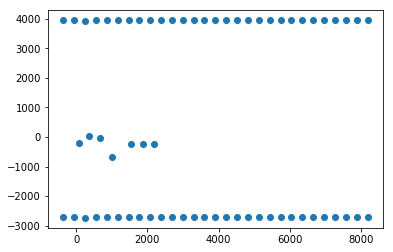

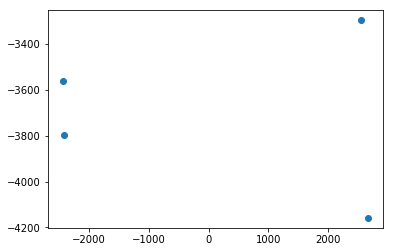

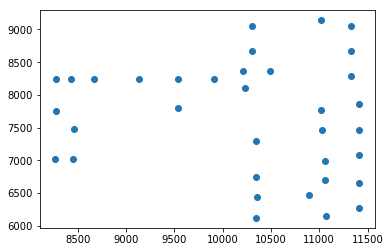

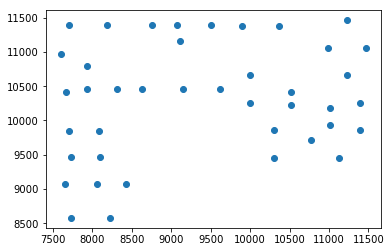

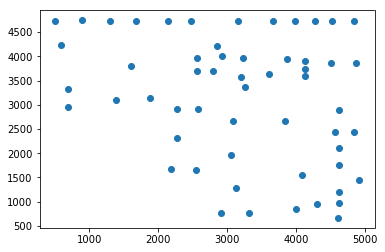

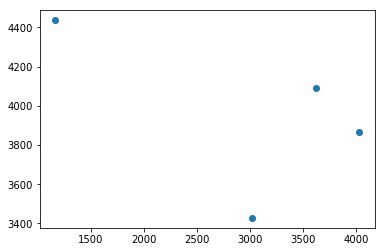

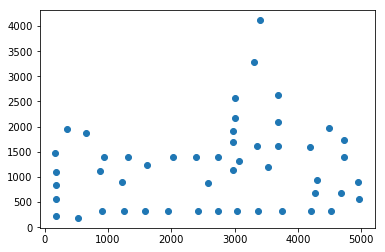

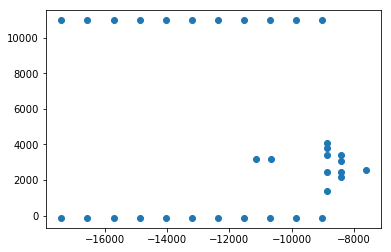

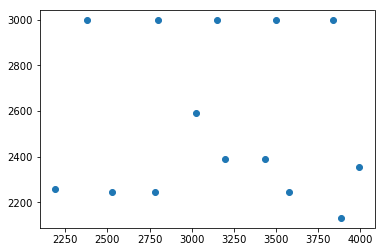

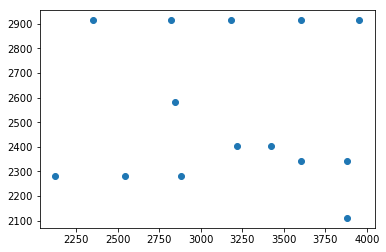

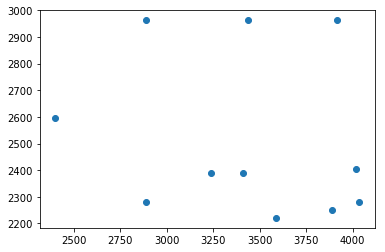

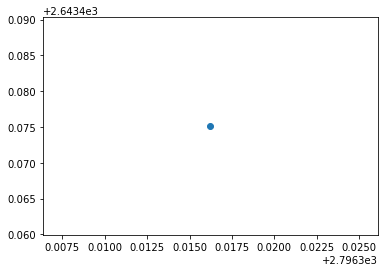

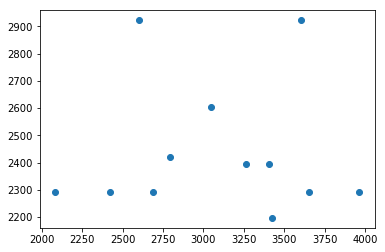

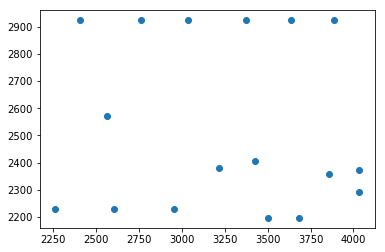

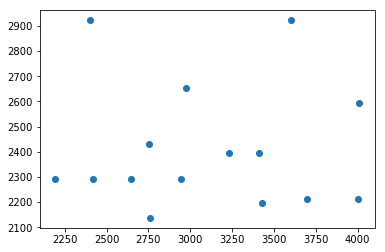

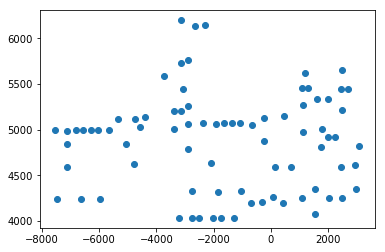

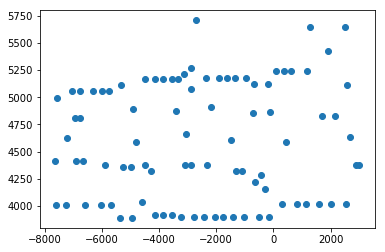

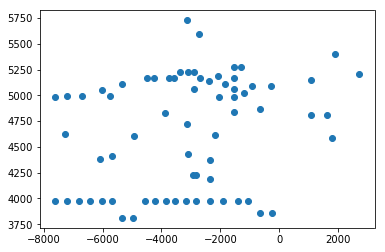

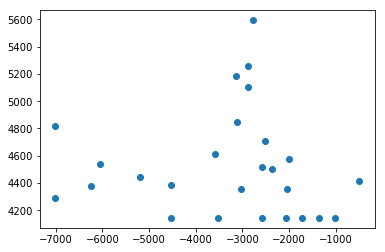

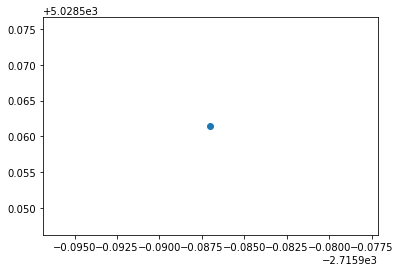

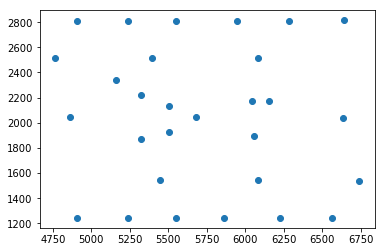

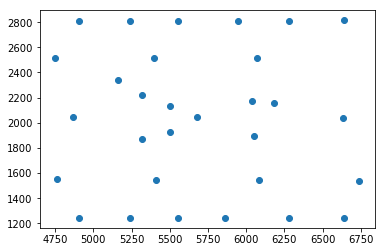

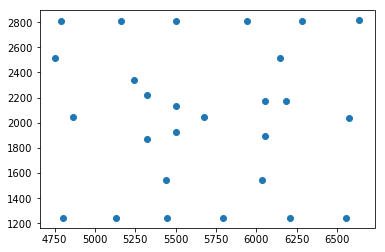

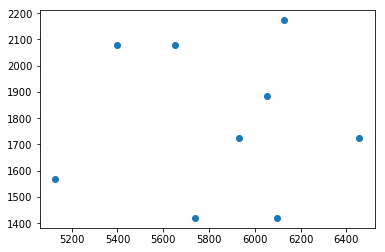

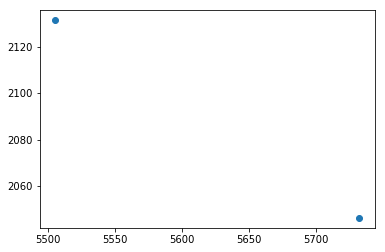

In [20]:
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
import re

# get all label csv files
label_csv_files = list(Path("./data/processed/cad_maps/").glob("**/*_labels.csv"))

pbar = tqdm(label_csv_files)
for csv_file in pbar:
    csv_file_path = str(csv_file)
    pbar.set_description(f"Processing {csv_file_path}...")

    pattern = "^building_(.+)_floor_(.+)_labels\\.csv$"

    match = re.search(pattern, csv_file.name)
    if match is not None:
        # if extraction was successful, read metric df and compose tuple
        building_id, floor_id = match.groups()
    else:
        print(f"Weird file {csv_file_path}")
        continue

    floor_labels = pd.read_csv(csv_file_path, index_col=0)

    floor_plot_labels = floor_labels[floor_labels["Label Type"] == "Room ID"]
    floor_plot_labels["Label Text"].to_list()

    labels = floor_plot_labels["Label Text"].to_list()
    label_x_coords = floor_plot_labels["X-coordinate"].to_numpy()
    label_y_coords = floor_plot_labels["Y-coordinate"].to_numpy()
    fig = plt.figure()
    plt.scatter(label_x_coords, label_y_coords)


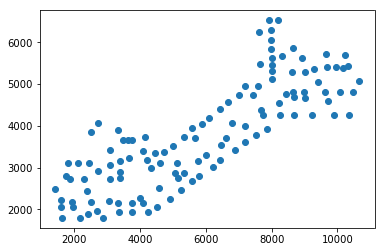

In [17]:
plt.scatter(label_x_coords, label_y_coords)